In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import numpy as np

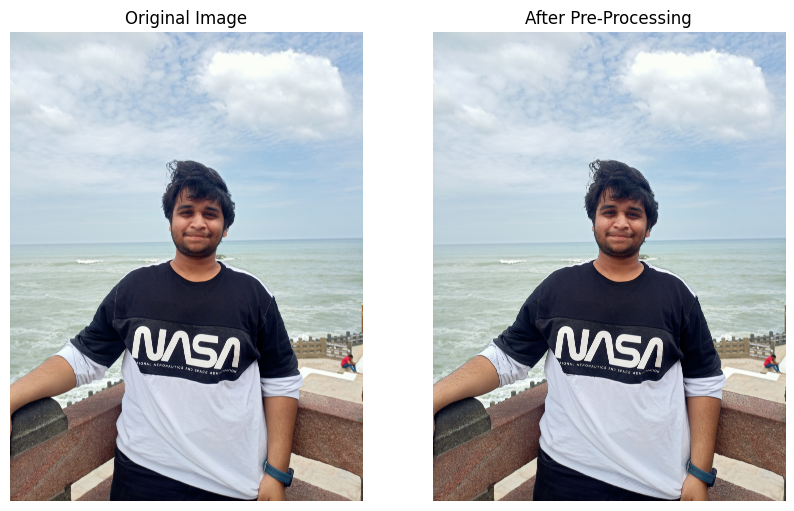

In [ ]:
from PIL import Image, ImageFilter
import numpy as np
import cv2
import matplotlib.pyplot as plt

def cartoonify(image_path):
    # Open the image using Pillow
    img = Image.open(image_path)

    # Convert the image to RGB mode (3 channels)
    img = img.convert("RGB")

    # Convert the image to a NumPy array
    img_np = np.array(img)

    # Convert the image to BGR format (OpenCV uses BGR format)
    img_bgr = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    # Apply median blur to the grayscale image
    gray = cv2.medianBlur(gray, 5)

    # Apply adaptive thresholding to create an edge mask
    edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)

    # Convert the edge mask back to a 3-channel image
    edges_bgr = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    # Perform bitwise_and operation to get the cartoon image
    cartoon = cv2.bitwise_and(img_bgr, edges_bgr)

    # Convert the cartoon image back to RGB format
    cartoon_rgb = cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB)

    # Convert the cartoon numpy array to Pillow image
    cartoon_image = Image.fromarray(cartoon_rgb)

    return cartoon_image

if __name__ == "__main__":
    image_path = "/content/IMG20220625123856.jpg"  # Replace with the path to your image
    cartoon_image = cartoonify(image_path)

    # Display the original image
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(Image.open(image_path))
    plt.axis("off")
    plt.title("Original Image")

    # Display the cartoonified image
    plt.subplot(1, 2, 2)
    plt.imshow(cartoon_image)
    plt.axis("off")
    plt.title("After Pre-Processing")

    plt.show()


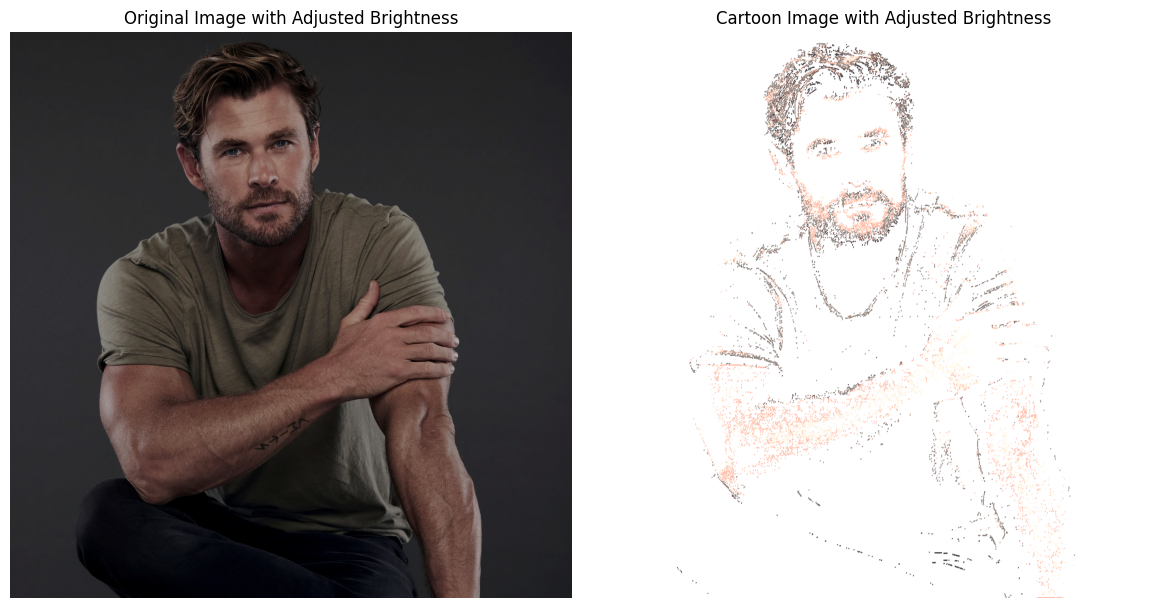

In [ ]:
from PIL import Image, ImageFilter, ImageOps, ImageDraw, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt

def adjust_brightness(image, factor):
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)

def cartoonify(image_path, edge_threshold=100, num_colors=16, exaggeration_factor=1.5,line_thickness=1.7):
    # Load the image using Pillow
    img = Image.open(image_path)

    # Convert the image to RGB mode (3 channels)
    img = img.convert("RGB")

    # Step 1: Edge Detection
    gray = img.convert("L")
    edges = gray.filter(ImageFilter.FIND_EDGES)

    # Step 2: Color Simplification
    quantized = img.quantize(colors=num_colors, method=2)

    # Step 3: Combine Edges and Colors
    cartoon_image = Image.new("RGB", img.size)
    draw = ImageDraw.Draw(cartoon_image)
    for x in range(img.width):
        for y in range(img.height):
            edge_intensity = edges.getpixel((x, y))
            color_index = quantized.getpixel((x, y))

            # Get the RGB color corresponding to the color index
            color = quantized.getpalette()[color_index * 3 : color_index * 3 + 3]

            # Exaggerate edges by darkening the colors
            color = tuple(int(c * exaggeration_factor) for c in color)

            if edge_intensity > edge_threshold:
                # Use thicker lines for drawing
                line_radius = round(line_thickness / 2)
                for dx in range(-line_radius, line_radius + 1):
                    for dy in range(-line_radius, line_radius + 1):
                        draw.point((x + dx, y + dy), fill=color)
            else:
                draw.point((x, y), fill=(255, 255, 255))

    return cartoon_image

if __name__ == "__main__":
    image_path = "/content/image.jpg"  # Replace with the path to your image

    # Load the original image
    original_image = Image.open(image_path)

    # Cartoonify the image
    cartoon_image = cartoonify(image_path)

    # Display the original image with adjusted brightness
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(adjust_brightness(original_image, 0.7))  # Adjust brightness factor as needed
    plt.axis("off")
    plt.title("Original Image with Adjusted Brightness")

    # Display the cartoonified image with adjusted brightness
    plt.subplot(1, 2, 2)
    plt.imshow(adjust_brightness(cartoon_image, 1.2))  # Adjust brightness factor as needed
    plt.axis("off")
    plt.title("Cartoon Image with Adjusted Brightness")

    plt.tight_layout()
    plt.show()

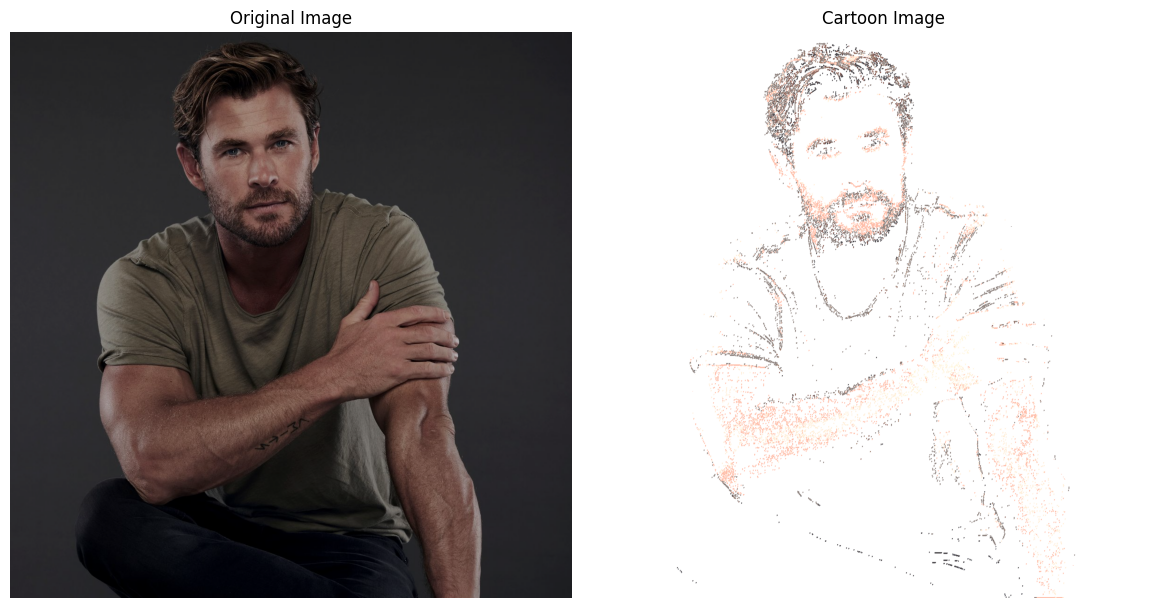

In [ ]:
from PIL import Image, ImageFilter, ImageDraw, ImageEnhance

def adjust_brightness(image, factor):
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)

def cartoonify(image_path, edge_threshold=100, num_colors=16, exaggeration_factor=1.5, line_thickness=2.5):
    # Load the image using Pillow
    img = Image.open(image_path)

    # Convert the image to RGB mode (3 channels)
    img = img.convert("RGB")

    # Step 1: Edge Detection
    edges = img.filter(ImageFilter.FIND_EDGES)

    # Step 2: Color Simplification
    quantized = img.quantize(colors=num_colors, method=2)

    # Step 3: Combine Edges and Colors
    cartoon_image = Image.new("RGB", img.size)
    draw = ImageDraw.Draw(cartoon_image)
    for x in range(img.width):
        for y in range(img.height):
            edge_intensity = edges.getpixel((x, y))[0]
            color_index = quantized.getpixel((x, y))

            # Get the RGB color corresponding to the color index
            color = quantized.getpalette()[color_index * 3 : color_index * 3 + 3]

            # Exaggerate edges by darkening the colors
            color = tuple(int(c * exaggeration_factor) for c in color)

            if edge_intensity > edge_threshold:
                # Use thicker lines for drawing
                line_radius = round(line_thickness / 2)
                for dx in range(-line_radius, line_radius + 1):
                    for dy in range(-line_radius, line_radius + 1):
                        draw.point((x + dx, y + dy), fill=color)
            else:
                draw.point((x, y), fill=(255, 255, 255))

    return cartoon_image

if __name__ == "__main__":
    image_path = "/content/image.jpg"  # Replace with the path to your image

    # Load the original image
    original_image = Image.open(image_path)

    # Cartoonify the image
    cartoon_image = cartoonify(image_path)

    # Display the original image with adjusted brightness
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(adjust_brightness(original_image, 0.7))  # Adjust brightness factor as needed
    plt.axis("off")
    plt.title("Original Image")

    # Display the cartoonified image with adjusted brightness
    plt.subplot(1, 2, 2)
    plt.imshow(adjust_brightness(cartoon_image, 1.2))  # Adjust brightness factor as needed
    plt.axis("off")
    plt.title("Cartoon Image")

    plt.tight_layout()
    plt.show()

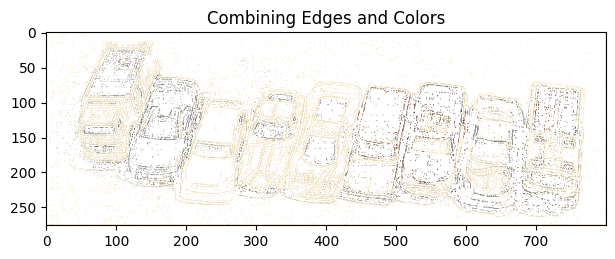

In [ ]:
from PIL import Image, ImageFilter, ImageDraw, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt

def adjust_brightness(image, factor):
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)

def calculate_evaluation_score(cartoon_image):
    # Example: Calculate the score based on the sum of pixel intensities
    pixel_array = np.array(cartoon_image)
    score = pixel_array.sum()
    return score

def cartoonify(image_path, edge_threshold=100, num_colors=16, exaggeration_factor=1.5, line_thickness=2.5):
    # Load the image using Pillow
    img = Image.open(image_path)

    # Convert the image to RGB mode (3 channels)
    img = img.convert("RGB")

    # Step 1: Edge Detection
    edges = img.filter(ImageFilter.FIND_EDGES)

    # Step 2: Color Simplification
    quantized = img.quantize(colors=num_colors, method=2)

    # Step 3: Combine Edges and Colors
    cartoon_image = Image.new("RGB", img.size)
    draw = ImageDraw.Draw(cartoon_image)
    for x in range(img.width):
        for y in range(img.height):
            edge_intensity = edges.getpixel((x, y))[0]
            color_index = quantized.getpixel((x, y))

            # Get the RGB color corresponding to the color index
            color = quantized.getpalette()[color_index * 3 : color_index * 3 + 3]

            # Exaggerate edges by darkening the colors
            color = tuple(int(c * exaggeration_factor) for c in color)

            if edge_intensity > edge_threshold:
                # Use thicker lines for drawing
                line_radius = round(line_thickness / 2)
                for dx in range(-line_radius, line_radius + 1):
                    for dy in range(-line_radius, line_radius + 1):
                        draw.point((x + dx, y + dy), fill=color)
            else:
                draw.point((x, y), fill=(255, 255, 255))

    return cartoon_image

image_path = "/content/ToyCars.jpg"  # Replace with the path to your image
original_image = Image.open(image_path)

# Iterate through parameter ranges and display results
best_score = float("-inf")
best_cartoon = None
your_threshold = 100000  # Set your own stopping threshold

for edge_threshold in range(50, 200, 25):
    for num_colors in range(8, 65, 8):
        for exaggeration_factor in np.arange(1.0, 2.1, 0.2):
            for line_thickness in np.arange(1.0, 6.1, 0.5):
                cartoon_image = cartoonify(image_path, edge_threshold, num_colors, exaggeration_factor, line_thickness)

                # Calculate a score to assess the quality of the cartoon image
                score = calculate_evaluation_score(cartoon_image)  # Implement your own evaluation function

                if score > best_score:
                    best_score = score
                    best_cartoon = cartoon_image

                # Early stopping condition
                if best_score >= your_threshold:
                    break
            if best_score >= your_threshold:
                break
        if best_score >= your_threshold:
            break
    if best_score >= your_threshold:
        break

# Display the original image
plt.figure(figsize=(12, 6))


# Display the best cartoonified image with adjusted brightness
plt.subplot(1, 2, 2)
plt.imshow(adjust_brightness(best_cartoon, 1.2))  # Adjust brightness factor as needed
plt.axis("on")
plt.title("Combining Edges and Colors")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:01<00:00, 138MB/s]


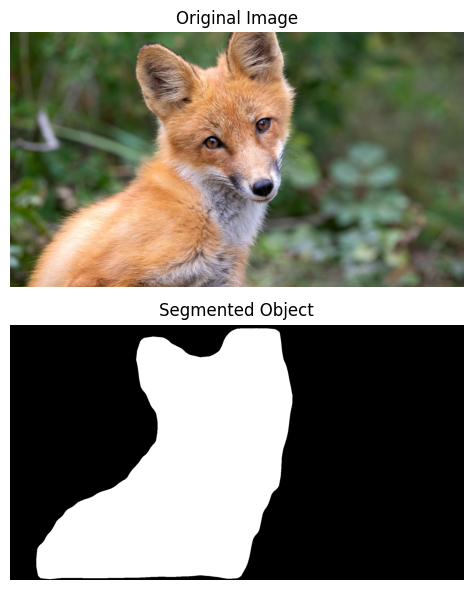

In [ ]:
from PIL import Image, ImageFilter, ImageDraw, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T
import torchvision.transforms.functional as F
from torchvision.models.detection import maskrcnn_resnet50_fpn

def adjust_brightness(image, factor):
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)

def calculate_evaluation_score(cartoon_image):
    pixel_array = np.array(cartoon_image)
    score = pixel_array.sum()
    return score

def object_segmentation(image_path):
    # Load the image using Pillow
    img = Image.open(image_path)

    # Load a pre-trained Mask R-CNN model
    model = maskrcnn_resnet50_fpn(pretrained=True)
    model.eval()

    # Transform the input image
    transform = T.Compose([T.ToTensor()])
    img_tensor = transform(img).unsqueeze(0)

    # Run inference to get predictions
    with torch.no_grad():
        prediction = model(img_tensor)

    # Get the predicted mask
    masks = prediction[0]['masks']
    mask = masks[0, 0].cpu().numpy()

    # Apply the mask to the original image
    object_image = Image.fromarray((mask > 0.5).astype(np.uint8) * 255)

    return object_image

# Input image path
image_path = "/content/637f6a142500005c003718d9.jpeg"  # Replace with the path to your image

# Load the original image
original_image = Image.open(image_path)

# Segment the object
object_image = object_segmentation(image_path)

# Display the segmented object (you can replace this with your preferred visualization)

# Display the original image
plt.figure(figsize=(10, 6))

# Create the first subplot for the original image
plt.subplot(2, 1, 1)  # 2 rows, 1 column, this is the first subplot
plt.imshow(original_image)
plt.axis("off")
plt.title("Original Image")

# Create the second subplot for the segmented object
plt.subplot(2, 1, 2)  # 2 rows, 1 column, this is the second subplot
plt.imshow(object_image, cmap='gray')
plt.axis("off")  # You can use plt.axis("on") if you want to show axes
plt.title("Segmented Object")

plt.tight_layout()
plt.show()


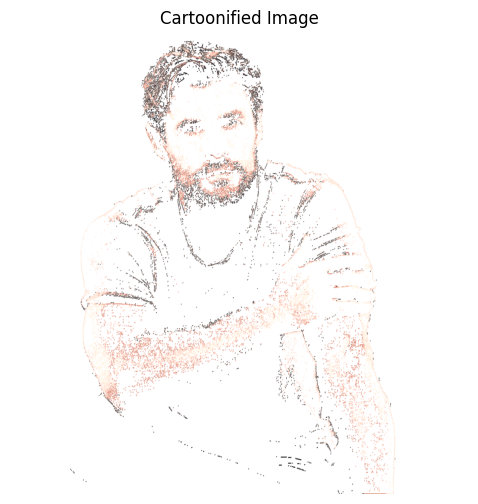

In [ ]:
from PIL import Image, ImageFilter, ImageDraw, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
import torchvision.transforms as T
import torchvision.transforms.functional as F
from torchvision.models.detection import maskrcnn_resnet50_fpn

def adjust_brightness(image, factor):
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)

def calculate_evaluation_score(cartoon_image):
    pixel_array = np.array(cartoon_image)
    score = pixel_array.sum()
    return score

def cartoonify(image_path, edge_threshold=100, num_colors=16, exaggeration_factor=1.5, line_thickness=2.5, fill_color=(255, 255, 255)):
    img = Image.open(image_path)
    img = img.convert("RGB")

    # Step 1: Edge Detection
    edges = img.filter(ImageFilter.FIND_EDGES)

    # Step 2: Color Simplification
    quantized = img.quantize(colors=num_colors, method=2)

    # Step 3: Combine Edges and Colors
    cartoon_image = Image.new("RGB", img.size)
    draw = ImageDraw.Draw(cartoon_image)

    for x in range(img.width):
        for y in range(img.height):
            edge_intensity = edges.getpixel((x, y))[0]
            color_index = quantized.getpixel((x, y))
            color = quantized.getpalette()[color_index * 3: color_index * 3 + 3]
            color = tuple(int(c * exaggeration_factor) for c in color)

            if edge_intensity > edge_threshold:
                line_radius = round(line_thickness / 2)
                for dx in range(-line_radius, line_radius + 1):
                    for dy in range(-line_radius, line_radius + 1):
                        draw.point((x + dx, y + dy), fill=color)
            else:
                draw.point((x, y), fill=fill_color)  # Fill with user-specified color for non-edge pixels

    return cartoon_image

def object_segmentation(image_path):
    # Load the image using Pillow
    img = Image.open(image_path)

    # Load a pre-trained Mask R-CNN model
    model = maskrcnn_resnet50_fpn(pretrained=True)
    model.eval()

    # Transform the input image
    transform = T.Compose([T.ToTensor()])
    img_tensor = transform(img).unsqueeze(0)

    # Run inference to get predictions
    with torch.no_grad():
        prediction = model(img_tensor)

    # Get the predicted mask
    masks = prediction[0]['masks']
    mask = masks[0, 0].cpu().numpy()

    # Apply the mask to the original image
    object_image = Image.fromarray((mask > 0.5).astype(np.uint8) * 255)

    return object_image

# Input image path
image_path = "/content/image.jpg"  # Replace with the path to your image

# Load the original image
original_image = Image.open(image_path)

# Segment the object
object_image = object_segmentation(image_path)

# Apply the cartoonify effect to the segmented object
cartoonified_object = cartoonify(image_path, edge_threshold=100, num_colors=16, exaggeration_factor=1.5, line_thickness=2.5, fill_color=(255, 255, 255))

# Convert cartoonified object to RGBA
cartoonified_object = cartoonified_object.convert("RGBA")

# Create a mask from the alpha channel
mask = cartoonified_object.split()[3]

# Paste the original background image onto the final image
final_image = original_image.copy()

# Paste the cartoonified object onto the final image using the mask
final_image.paste(cartoonified_object, (0, 0), mask)

# Display the result
plt.figure(figsize=(12, 6))
plt.imshow(final_image)
plt.axis("off")
plt.title("Cartoonified Image")
plt.show()


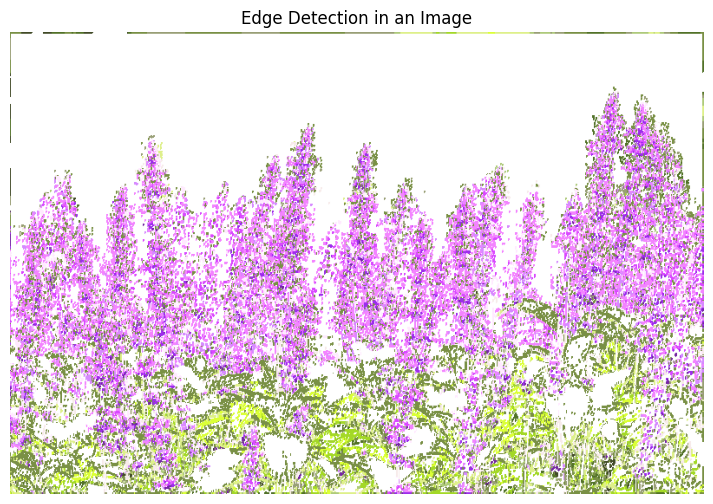

In [ ]:
from PIL import Image, ImageFilter, ImageDraw, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
import torchvision.transforms as T
import torchvision.transforms.functional as F
from torchvision.models.detection import maskrcnn_resnet50_fpn

def adjust_brightness(image, factor):
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)

def calculate_evaluation_score(cartoon_image):
    pixel_array = np.array(cartoon_image)
    score = pixel_array.sum()
    return score

def cartoonify(image_path, edge_threshold=50, num_colors=16, exaggeration_factor=1.5, line_thickness=2.5, fill_color=(255, 255, 255)):
    img = Image.open(image_path)
    img = img.convert("RGB")

    # Step 1: Edge Detection
    edges = img.filter(ImageFilter.FIND_EDGES)

    # Step 2: Color Simplification
    quantized = img.quantize(colors=num_colors, method=2)

    # Step 3: Combine Edges and Colors
    cartoon_image = Image.new("RGB", img.size)
    draw = ImageDraw.Draw(cartoon_image)

    for x in range(img.width):
        for y in range(img.height):
            edge_intensity = edges.getpixel((x, y))[0]
            color_index = quantized.getpixel((x, y))
            color = quantized.getpalette()[color_index * 3: color_index * 3 + 3]
            color = tuple(int(c * exaggeration_factor) for c in color)

            if edge_intensity > edge_threshold:
                line_radius = round(line_thickness / 2)
                for dx in range(-line_radius, line_radius + 1):
                    for dy in range(-line_radius, line_radius + 1):
                        draw.point((x + dx, y + dy), fill=color)
            else:
                draw.point((x, y), fill=fill_color)  # Fill with user-specified color for non-edge pixels

    return cartoon_image

def object_segmentation(image_path):
    # Load the image using Pillow
    img = Image.open(image_path)

    # Load a pre-trained Mask R-CNN model
    model = maskrcnn_resnet50_fpn(pretrained=True)
    model.eval()

    # Transform the input image
    transform = T.Compose([T.ToTensor()])
    img_tensor = transform(img).unsqueeze(0)

    # Run inference to get predictions
    with torch.no_grad():
        prediction = model(img_tensor)

    # Get the predicted mask
    masks = prediction[0]['masks']
    mask = masks[0, 0].cpu().numpy()

    # Apply the mask to the original image
    object_image = Image.fromarray((mask > 0.5).astype(np.uint8) * 255)

    return object_image

# Input image path
image_path = "/content/purple-flowers.jpg.crdownload"  # Replace with the path to your image

# Load the original image
original_image = Image.open(image_path)

# Segment the object
object_image = object_segmentation(image_path)

# Apply the cartoonify effect to the segmented object
cartoonified_object = cartoonify(image_path, edge_threshold=50, num_colors=16, exaggeration_factor=1.5, line_thickness=2.5, fill_color=(255, 255, 255))

# Convert cartoonified object to RGBA
cartoonified_object = cartoonified_object.convert("RGBA")

# Create a mask from the alpha channel
mask = cartoonified_object.split()[3]

# Paste the original background image onto the final image
final_image = original_image.copy()

# Paste the cartoonified object onto the final image using the mask
final_image.paste(cartoonified_object, (0, 0), mask)

# Display the result
plt.figure(figsize=(12, 6))
plt.imshow(final_image)
plt.axis("off")
plt.title("Edge Detection in an Image")
plt.show()

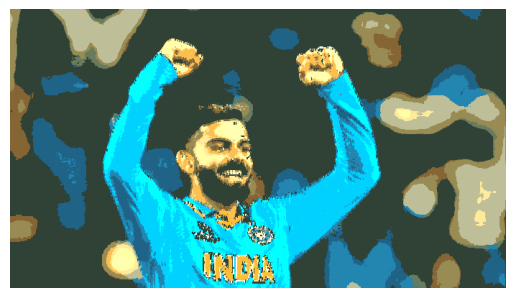

In [ ]:
from PIL import Image, ImageFilter, ImageDraw, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
import torchvision.transforms as T
import torchvision.transforms.functional as F
from torchvision.models.detection import maskrcnn_resnet50_fpn

def adjust_brightness(image, factor):
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)

def calculate_evaluation_score(cartoon_image):
    pixel_array = np.array(cartoon_image)
    score = pixel_array.sum()
    return score

def cartoonify(image_path, edge_threshold=50, num_colors=16, exaggeration_factor=1.5, line_thickness=2.5, fill_color=(255, 255, 255)):
    img = Image.open(image_path)
    img = img.convert("RGB")

    # Step 1: Edge Detection (Canny)
    edges = img.convert("L")  # Convert to grayscale
    edges = cv2.Canny(np.array(edges), threshold1=30, threshold2=100)  # Apply Canny edge detection
    edges = Image.fromarray(edges, "L")

    # Step 2: Color Simplification
    quantized = img.quantize(colors=num_colors, method=2)

    # Convert colors to grayscale mode for Gaussian blur
    colors = quantized.convert("L")
    colors = colors.filter(ImageFilter.GaussianBlur(radius=2))  # Apply Gaussian blur to colors

    # Step 3: Combine Edges and Colors
    cartoon_image = Image.new("RGB", img.size)
    draw = ImageDraw.Draw(cartoon_image)

    for x in range(img.width):
        for y in range(img.height):
            edge_intensity = edges.getpixel((x, y))
            color_index = quantized.getpixel((x, y))
            color = quantized.getpalette()[color_index * 3: color_index * 3 + 3]
            color = tuple(int(c * exaggeration_factor) for c in color)

            line_radius = round(line_thickness / 2 * (edge_intensity / 255))
            for dx in range(-line_radius, line_radius + 1):
                for dy in range(-line_radius, line_radius + 1):
                    draw.point((x + dx, y + dy), fill=color)

    # Post-processing: Adjust brightness and contrast
    cartoon_image = adjust_brightness(cartoon_image, factor=1.2)
    cartoon_image = ImageEnhance.Contrast(cartoon_image).enhance(1.2)

    return cartoon_image

def object_segmentation(image_path):
    # Load the image using Pillow
    img = Image.open(image_path)

    # Load a pre-trained Mask R-CNN model
    model = maskrcnn_resnet50_fpn(pretrained=True)
    model.eval()

    # Transform the input image
    transform = T.Compose([T.ToTensor()])
    img_tensor = transform(img).unsqueeze(0)

    # Run inference to get predictions
    with torch.no_grad():
        prediction = model(img_tensor)

    # Get the predicted mask
    masks = prediction[0]['masks']
    mask = masks[0, 0].cpu().numpy()

    # Apply the mask to the original image
    object_image = Image.fromarray((mask > 0.5).astype(np.uint8) * 255)

    return object_image

# Input image path
image_path = "/content/virat-kohli-121638457-16x9_2.jpg"  # Replace with the path to your image

# Load the original image
original_image = Image.open(image_path)

# Segment the object
object_image = object_segmentation(image_path)

# Apply the cartoonify effect to the segmented object
cartoonified_object = cartoonify(image_path, edge_threshold=50, num_colors=16, exaggeration_factor=1.5, line_thickness=2.5, fill_color=(255, 255, 255))

# Convert cartoonified object to RGBA
cartoonified_object = cartoonified_object.convert("RGBA")

# Create a mask from the alpha channel
mask = cartoonified_object.split()[3]

# Paste the original background image onto the final image
final_image = original_image.copy()

# Paste the cartoonified object onto the final image using the mask
final_image.paste(cartoonified_object, (0, 0), mask)

# Display the result
plt.figure() #figsize=(12, 6)
plt.imshow(final_image)
plt.axis("off")
#plt.title("Cartoonified Image")
plt.show()

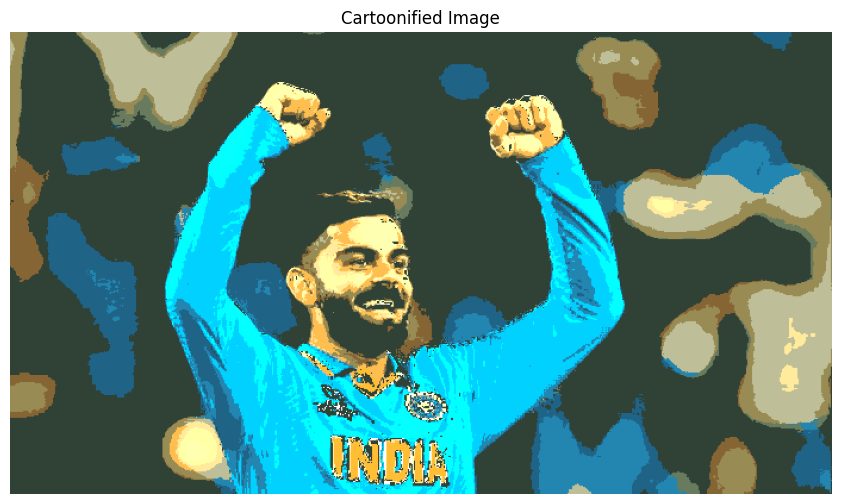

In [ ]:
from PIL import Image, ImageFilter, ImageDraw, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
import torchvision.transforms as T
import torchvision.transforms.functional as F
from torchvision.models.detection import maskrcnn_resnet50_fpn

def adjust_brightness(image, factor):
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)

def calculate_evaluation_score(cartoon_image):
    pixel_array = np.array(cartoon_image)
    score = pixel_array.sum()
    return score

def cartoonify(image_path, edge_threshold=50, num_colors=16, exaggeration_factor=1.5, line_thickness=2.5, fill_color=(255, 255, 255)):
    img = Image.open(image_path)
    img = img.convert("RGB")

    # Step 1: Edge Detection (Canny)
    edges = img.convert("L")  # Convert to grayscale
    edges = cv2.Canny(np.array(edges), threshold1=30, threshold2=100)  # Apply Canny edge detection
    edges = Image.fromarray(edges, "L")

    # Step 2: Color Simplification
    quantized = img.quantize(colors=num_colors, method=2)

    # Convert colors to grayscale mode for Gaussian blur
    colors = quantized.convert("L")

    # Apply Gaussian blur to both edges and colors for a silky smooth effect
    edges = edges.filter(ImageFilter.GaussianBlur(radius=2))
    colors = colors.filter(ImageFilter.GaussianBlur(radius=2))

    # Step 3: Combine Edges and Colors
    cartoon_image = Image.new("RGB", img.size)
    draw = ImageDraw.Draw(cartoon_image)

    for x in range(img.width):
        for y in range(img.height):
            edge_intensity = edges.getpixel((x, y))
            color_intensity = colors.getpixel((x, y))

            color_index = quantized.getpixel((x, y))
            color = quantized.getpalette()[color_index * 3: color_index * 3 + 3]
            color = tuple(int(c * exaggeration_factor) for c in color)

            line_radius = round(line_thickness / 2 * (edge_intensity / 255))
            for dx in range(-line_radius, line_radius + 1):
                for dy in range(-line_radius, line_radius + 1):
                    draw.point((x + dx, y + dy), fill=color)

    # Post-processing: Adjust brightness and contrast
    cartoon_image = adjust_brightness(cartoon_image, factor=1.2)
    cartoon_image = ImageEnhance.Contrast(cartoon_image).enhance(1.2)

    return cartoon_image

def object_segmentation(image_path):
    # Load the image using Pillow
    img = Image.open(image_path)

    # Load a pre-trained Mask R-CNN model
    model = maskrcnn_resnet50_fpn(pretrained=True)
    model.eval()

    # Transform the input image
    transform = T.Compose([T.ToTensor()])
    img_tensor = transform(img).unsqueeze(0)

    # Run inference to get predictions
    with torch.no_grad():
        prediction = model(img_tensor)

    # Get the predicted mask
    masks = prediction[0]['masks']
    mask = masks[0, 0].cpu().numpy()

    # Apply the mask to the original image
    object_image = Image.fromarray((mask > 0.5).astype(np.uint8) * 255)

    return object_image

# Input image path
image_path = "/content/virat-kohli-121638457-16x9_2.jpg"  # Replace with the path to your image

# Load the original image
original_image = Image.open(image_path)

# Segment the object
object_image = object_segmentation(image_path)

# Apply the cartoonify effect to the segmented object
cartoonified_object = cartoonify(image_path, edge_threshold=50, num_colors=16, exaggeration_factor=1.5, line_thickness=2.5, fill_color=(255, 255, 255))

# Convert cartoonified object to RGBA
cartoonified_object = cartoonified_object.convert("RGBA")

# Create a mask from the alpha channel
mask = cartoonified_object.split()[3]

# Paste the original background image onto the final image
final_image = original_image.copy()

# Paste the cartoonified object onto the final image using the mask
final_image.paste(cartoonified_object, (0, 0), mask)

# Display the result
plt.figure(figsize=(12, 6))
plt.imshow(final_image)
plt.axis("off")
plt.title("Cartoonified Image")
plt.show()